<a href="https://colab.research.google.com/github/DINESH244DK/TASK_5/blob/main/TASK_5_GUVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [8]:
users = pd.read_csv('takehome_users.csv',encoding='latin-1')
user_engagement = pd.read_csv('takehome_user_engagement.csv')

In [9]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
users.info()

In [ ]:
user_engagement.info()

In [12]:

# Checking columns have entries as expected
print(users.creation_source.value_counts())
print(users.opted_in_to_mailing_list.value_counts())
print(users.enabled_for_marketing_drip.value_counts())


ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64
0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64
0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64


In [13]:
df = users.email.value_counts().to_frame()
temp_list = list(df[df.email==2].index)
users[users.email.isin(temp_list)].sort_values(by='email').head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1603,1604,2014-02-03 04:48:08,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,1.391662e+09,0,0,0,4128.0
3822,3823,2012-11-22 05:51:29,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,1.353650e+09,0,0,169,9498.0
5280,5281,2012-09-29 11:54:08,Bach Amanda,AmandaABach@gmail.com,SIGNUP_GOOGLE_AUTH,1.401883e+09,0,0,146,NaN
9040,9041,2013-01-03 00:53:47,Bach Amanda,AmandaABach@gmail.com,ORG_INVITE,NaN,0,0,377,6208.0
375,376,2012-08-10 22:27:08,Tye Jacob,JacobTye@gmail.com,SIGNUP_GOOGLE_AUTH,1.344638e+09,1,0,104,NaN
5081,5082,2013-06-25 19:31:11,Tye Jacob,JacobTye@gmail.com,SIGNUP_GOOGLE_AUTH,1.372361e+09,0,0,298,NaN
3605,3606,2013-05-10 08:31:59,Sankt Janina,JaninaSankt@gmail.com,GUEST_INVITE,1.369816e+09,0,0,84,8356.0
1169,1170,2014-04-27 16:48:34,Sankt Janina,JaninaSankt@gmail.com,ORG_INVITE,1.398617e+09,1,1,285,623.0
10153,10154,2014-05-06 10:57:37,Neudorf Kerstin,KerstinNeudorf@gmail.com,ORG_INVITE,1.400238e+09,0,0,359,4563.0
11244,11245,2014-01-17 18:05:15,Neudorf Kerstin,KerstinNeudorf@gmail.com,SIGNUP,1.389982e+09,1,1,68,NaN


In [14]:
# Converting date columns to datetime objects
users.creation_time= pd.to_datetime(users.creation_time)
users.last_session_creation_time = pd.to_datetime(users.last_session_creation_time,unit='s')

In [15]:
# Checking data correctness by verifying last_session_creation_time is after creation_time
users[users.creation_time>users.last_session_creation_time]


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id


In [16]:
users[users.invited_by_user_id.isnull()].creation_source.value_counts()

PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [17]:
print(users[(users.creation_source=='PERSONAL_PROJECTS') & (users.invited_by_user_id.notnull())])
print(users[(users.creation_source=='SIGNUP') & (users.invited_by_user_id.notnull())])
print(users[(users.creation_source=='SIGNUP_GOOGLE_AUTH') & (users.invited_by_user_id.notnull())])

Empty DataFrame
Columns: [object_id, creation_time, name, email, creation_source, last_session_creation_time, opted_in_to_mailing_list, enabled_for_marketing_drip, org_id, invited_by_user_id]
Index: []
Empty DataFrame
Columns: [object_id, creation_time, name, email, creation_source, last_session_creation_time, opted_in_to_mailing_list, enabled_for_marketing_drip, org_id, invited_by_user_id]
Index: []
Empty DataFrame
Columns: [object_id, creation_time, name, email, creation_source, last_session_creation_time, opted_in_to_mailing_list, enabled_for_marketing_drip, org_id, invited_by_user_id]
Index: []


In [18]:
# Filling NaN values in invited_by_user_id by 0
users.invited_by_user_id.fillna(0,inplace=True)

In [19]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [20]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [21]:
user_engagement.visited.value_counts()

1    207917
Name: visited, dtype: int64

In [22]:
# Dropping the column
user_engagement.drop(['visited'],axis=1,inplace=True)

# Changing time_stamp column to datetime object
user_engagement.time_stamp= pd.to_datetime(user_engagement.time_stamp)

In [ ]:
user_engagement.info()

In [24]:
# Getting the userids with missing last_session_creation_time
nan_lastdt_userid = list(users[users.last_session_creation_time.isnull()].object_id)

In [25]:
# Checking the login dates for userids with missing last_session_creation_time in users dataframe
user_engagement[user_engagement.user_id.isin(nan_lastdt_userid)]

,time_stamp,user_id


In [26]:
users.last_session_creation_time.fillna(users.creation_time,inplace=True)

In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [28]:
users.describe(include = 'all')

<ipython-input-28-c0a168d6af07>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  users.describe(include = 'all')


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000,12000,12000,12000,12000,12000.000000,12000.000000,12000.000000,12000.000000
unique,NaN,11996,11355,11980,5,11998,NaN,NaN,NaN,NaN
top,NaN,2014-02-11 17:57:53,Araujo Gabriela,AlfieLane@yahoo.com,ORG_INVITE,2014-06-04 07:46:58,NaN,NaN,NaN,NaN
freq,NaN,2,5,2,4254,2,NaN,NaN,NaN,NaN
first,NaN,2012-05-31 00:43:27,NaN,NaN,NaN,2012-05-31 08:20:06,NaN,NaN,NaN,NaN
last,NaN,2014-05-30 23:59:19,NaN,NaN,NaN,2014-06-06 14:58:50,NaN,NaN,NaN,NaN
mean,6000.50000,NaN,NaN,NaN,NaN,NaN,0.249500,0.149333,141.884583,3188.691333
std,3464.24595,NaN,NaN,NaN,NaN,NaN,0.432742,0.356432,124.056723,3869.027693
min,1.00000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,29.000000,0.000000


In [29]:
u1=users[['object_id','org_id','invited_by_user_id']].copy()
r1=users[['object_id','org_id']].copy()
df = pd.merge(u1,r1,how='left',left_on='invited_by_user_id',right_on='object_id')
df.head()

,object_id_x,org_id_x,invited_by_user_id,object_id_y,org_id_y
0,1,11,10803.0,10803.0,11.0
1,2,1,316.0,316.0,1.0
2,3,94,1525.0,1525.0,94.0
3,4,1,5151.0,5151.0,1.0
4,5,193,5240.0,5240.0,193.0


In [30]:
df[(df.org_id_x!=df.org_id_y) & (df.invited_by_user_id!=0)]

,object_id_x,org_id_x,invited_by_user_id,object_id_y,org_id_y


In [31]:
# Adding org_size
temp = users.org_id.value_counts()
users['org_size'] = [temp[i] for i in users.org_id]

# Adding referred
users['referred'] = users.invited_by_user_id!=0

users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True


In [32]:
def get_visit_count(grp, freq):
    return grp.rolling(freq, on='time_stamp')['user_id'].count()

user_engagement['7_day_visit'] = user_engagement.groupby('user_id', as_index=False, group_keys=False).apply(get_visit_count, '7D')

# Creating a data frame with adopted_user status against the user_id
df_adopted = user_engagement.groupby('user_id')['7_day_visit'].max().to_frame().reset_index()
df_adopted['adopted_user'] = (df_adopted['7_day_visit']>2)
df_adopted.head()

,user_id,7_day_visit,adopted_user
0,1,1.0,False
1,2,3.0,True
2,3,1.0,False
3,4,1.0,False
4,5,1.0,False


In [33]:
# Merging 2 dataframes
df = pd.merge(users,df_adopted,how='outer',left_on='object_id',right_on='user_id').drop(['user_id','7_day_visit'],axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
 10  org_size                    12000 non-null  int64         
 11  referred                    12000 non-null  bool      

In [35]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True,False


In [36]:
df.adopted_user.fillna(False,inplace=True)

# Adding one more column for checking if the reference user is adopted
df = pd.merge(df,df[['object_id','adopted_user']], how='left',left_on='invited_by_user_id',right_on='object_id')
df.drop('object_id_y',axis=1,inplace=True)
df.rename(columns={'object_id_x':'object_id','adopted_user_x':'adopted_user','adopted_user_y':'adopted_reference'},inplace=True)
df.adopted_reference.fillna(False,inplace=True)
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user,adopted_reference
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True,False,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True,True,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True,False,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True,False,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True,False,True


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

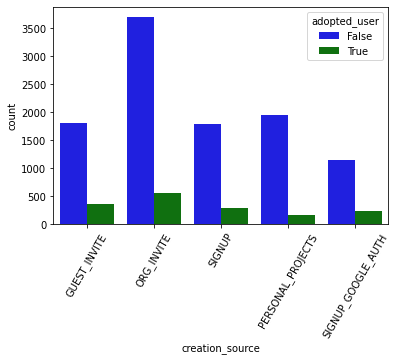

In [38]:
sns.countplot(x="creation_source", data=df,hue='adopted_user',palette=['blue','green'])
plt.xticks(rotation=60)


In [39]:
def plot_login(df):
    login_count = df.creation_time.to_frame()
    login_count.index = login_count.creation_time
    return login_count.resample("M").count()


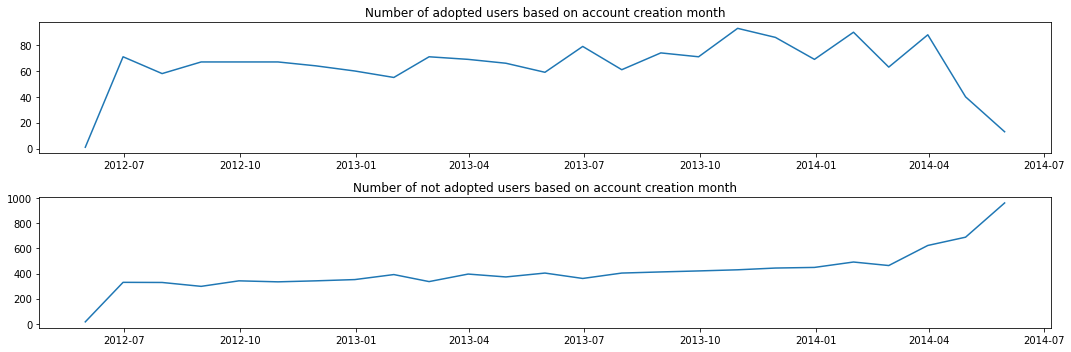

In [40]:
adopted_monthly_count = plot_login(df[df.adopted_user==True])
not_adopted_monthly_count = plot_login(df[df.adopted_user==False])

fig = plt.figure(figsize=(15, 5))
plt.subplot(2,1,1)
plt.plot(adopted_monthly_count)
plt.title('Number of adopted users based on account creation month')

plt.subplot(2,1,2)
plt.plot(not_adopted_monthly_count)
plt.title('Number of not adopted users based on account creation month')

plt.tight_layout()

In [41]:
df.drop(['object_id','creation_time','name','email','last_session_creation_time',],axis=1,inplace=True)

In [42]:
df_users = pd.get_dummies(df)
df_users.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user,adopted_reference,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803.0,75,True,False,False,1,0,0,0,0
1,0,0,1,316.0,233,True,True,False,0,1,0,0,0
2,0,0,94,1525.0,32,True,False,True,0,1,0,0,0
3,0,0,1,5151.0,233,True,False,True,1,0,0,0,0
4,0,0,193,5240.0,16,True,False,True,1,0,0,0,0


In [43]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            12000 non-null  int64  
 1   enabled_for_marketing_drip          12000 non-null  int64  
 2   org_id                              12000 non-null  int64  
 3   invited_by_user_id                  12000 non-null  float64
 4   org_size                            12000 non-null  int64  
 5   referred                            12000 non-null  bool   
 6   adopted_user                        12000 non-null  bool   
 7   adopted_reference                   12000 non-null  bool   
 8   creation_source_GUEST_INVITE        12000 non-null  uint8  
 9   creation_source_ORG_INVITE          12000 non-null  uint8  
 10  creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 11  creation_source_SIGNUP              12000

In [44]:
X = df_users.drop(labels=['adopted_user'],axis=1)
y = df_users.adopted_user

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Applying SelectKBest class to score the 12 features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenating two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(12,'Score'))

                                 Specs         Score
3                   invited_by_user_id  26272.387638
4                             org_size   6142.446090
2                               org_id   5418.462606
9    creation_source_PERSONAL_PROJECTS     56.844560
6                    adopted_reference     49.064999
7         creation_source_GUEST_INVITE     20.283149
11  creation_source_SIGNUP_GOOGLE_AUTH     13.848040
5                             referred      4.274697
10              creation_source_SIGNUP      0.857191
0             opted_in_to_mailing_list      0.590515
8           creation_source_ORG_INVITE      0.451700
1           enabled_for_marketing_drip      0.220970


[0.02115617 0.01799134 0.39085617 0.28395178 0.25770252 0.00113624
 0.01011597 0.00364094 0.00278697 0.00669458 0.00164971 0.00231762]


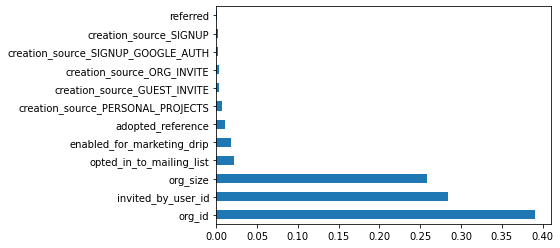

In [46]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

# Plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

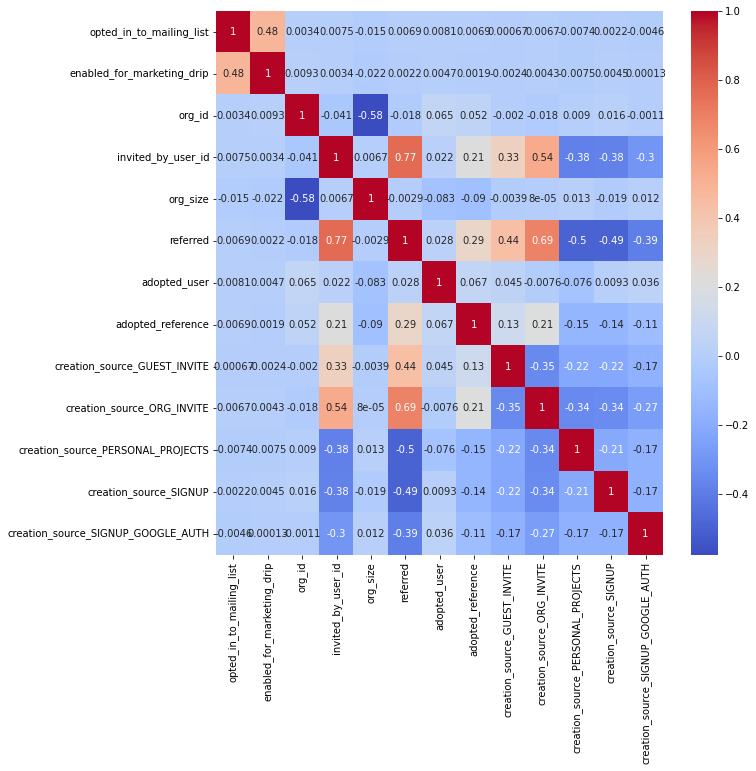

In [47]:
#get correlations of each features in dataset
corrmat = df_users.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_users[top_corr_features].corr(),annot=True,cmap="coolwarm")


In [48]:

from scipy import stats

# Function for calculating p-value matrix for multiple variables

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            df_clean = df.loc[:,[r,c]].dropna()
            pvalues[r][c]=round(stats.spearmanr(df_clean.iloc[:,0], df_clean.iloc[:,1])[1], 4)
    return pvalues

calculate_pvalues(df_users)

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user,adopted_reference,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
opted_in_to_mailing_list,0.0,0.0,0.5128,0.3912,0.4037,0.4476,0.3751,0.4497,0.9418,0.4634,0.4156,0.8112,0.6178
enabled_for_marketing_drip,0.0,0.0,0.2437,0.7302,0.3043,0.8082,0.6103,0.8322,0.7894,0.64,0.4102,0.6199,0.9889
org_id,0.5128,0.2437,0.0,0.0023,0.0,0.1445,0.0,0.0,0.9867,0.1315,0.6484,0.0563,0.5964
invited_by_user_id,0.3912,0.7302,0.0023,0.0,0.0129,0.0,0.0053,0.0,0.0,0.0,0.0,0.0,0.0
org_size,0.4037,0.3043,0.0,0.0129,0.0,0.1256,0.0,0.0,0.9147,0.0923,0.9442,0.0144,0.6689
referred,0.4476,0.8082,0.1445,0.0,0.1256,0.0,0.0024,0.0,0.0,0.0,0.0,0.0,0.0
adopted_user,0.3751,0.6103,0.0,0.0053,0.0,0.0024,0.0,0.0,0.0,0.4029,0.0,0.3084,0.0001
adopted_reference,0.4497,0.8322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
creation_source_GUEST_INVITE,0.9418,0.7894,0.9867,0.0,0.9147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
creation_source_ORG_INVITE,0.4634,0.64,0.1315,0.0,0.0923,0.0,0.4029,0.0,0.0,0.0,0.0,0.0,0.0


# **Conclusion:**




By doing the analysis it is infer that the most important features are org_id, org_size and finally invited_by_user_id.These are the important features in the given data.Also it is infer that most important factors in user adoption are related to interaction with other groups. If the user belongs to a group, the adoption is high. The bigger the size of the group, more are the chances for adoption. Adoption is also high for a user who is invited to sign up by another user.These are all the findings from the given dataset.